# **Business and Data Understanding - Wondermarket**
---

# Import Library

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import calendar

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [4]:
# Display the first 5 rows
df.head()

,Unnamed: 0,timestamp,store,region,product_item_id,product_item_category,product_item_quantity,product_item_price,revenue,cost_of_goods_sold,payment_method
0,0,2021-10-28 02:42:10,Richmond,London,ec91bca8-2c0e-4543-96af-0cb19514cc1c,Bakery,2.0,2.99,5.98,1.79,debit card
1,1,2021-07-08 21:37:47,Richmond,London,406f3f7d-cb2b-4712-b22f-b521e19aaa57,Canned food,10.0,1.09,10.90,4.36,debit card
2,2,2021-07-24 16:08:11,Richmond,London,294ec50f-56a6-4e01-8698-b3bef1457562,Fresh food,2.0,3.99,7.98,2.39,debit card
3,3,2021-09-22 22:47:07,Richmond,London,335dac5f-aa70-46e0-82c4-9e57351c3541,Meat & fish,2.0,2.79,5.58,3.35,credit card
4,4,2021-09-14 06:07:41,Richmond,London,e2e69ea2-659a-462c-9973-83a4a3e8cb1d,Canned food,2.0,5.99,11.98,4.79,credit card


In [5]:
# Display the last 5 rows
df.tail()

,Unnamed: 0,timestamp,store,region,product_item_id,product_item_category,product_item_quantity,product_item_price,revenue,cost_of_goods_sold,payment_method
52883,52883,2021-07-05 12:07:17,Lancaster,North,59362005-9671-4ff1-831a-ffc2c99147c8,Meat & fish,1.0,10.99,10.99,3.30,debit card
52884,52884,2021-08-11 07:39:08,Lancaster,North,3e4828a8-1aa9-4fea-8c0d-3e24e8177a5c,Meat & fish,1.0,2.09,2.09,0.63,credit card
52885,52885,2021-12-15 16:26:00,Lancaster,North,d88d8d87-030f-4281-95d1-b6ce185f35d7,Cleaning products,4.0,7.99,31.96,12.78,credit card
52886,52886,2021-11-10 02:33:34,Lancaster,North,406f3f7d-cb2b-4712-b22f-b521e19aaa57,Canned food,2.0,1.09,2.18,0.87,debit card
52887,52887,2021-09-23 23:35:58,Lancaster,North,7bc9ff38-4d6b-4f4c-9e90-c43231a82acc,Frozen food,10.0,5.99,59.90,35.94,cash


# 1. Data Understanding

## 1.1. Features Definition

| Feature Name           | Feature Description                                                   |
|------------------------|-----------------------------------------------------------------------|
| timestamp              | The date and time when a transaction occurred                         |
| store                  | The name or identifier of the store where the transaction took place  |
| region                 | The geographic region associated with the store                       |
| product_item_id        | The unique identifier of the product item being sold                  |
| product_item_category  | The category or type of the product item                              |
| product_item_quantity  | The quantity of the product item sold in the transaction              |
| product_item_price     | The price of a single unit of the product item                        |
| revenue                | The total revenue generated from the transaction                      |
| cost_of_goods_sold     | The cost incurred to produce or acquire the goods sold                |
| payment_method         | The method used for payment in the transaction                        |

## 1.2. Dimensions of the DataFrame

In [6]:
df.shape

(52888, 11)

In [7]:
print('Total rows: {}'.format(df.shape[0]))
print('Total cols: {}'.format(df.shape[1]))

Total rows: 52888
Total cols: 11


## 1.3. Data Types of the Features

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52888 entries, 0 to 52887
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             52888 non-null  int64  
 1   timestamp              52888 non-null  object 
 2   store                  52888 non-null  object 
 3   region                 52888 non-null  object 
 4   product_item_id        52888 non-null  object 
 5   product_item_category  52888 non-null  object 
 6   product_item_quantity  52888 non-null  float64
 7   product_item_price     52888 non-null  float64
 8   revenue                52888 non-null  float64
 9   cost_of_goods_sold     52888 non-null  float64
 10  payment_method         52888 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 4.4+ MB


In [9]:
# Statistics for the columns (features)
df.describe(include='all')

,Unnamed: 0,timestamp,store,region,product_item_id,product_item_category,product_item_quantity,product_item_price,revenue,cost_of_goods_sold,payment_method
count,52888.000000,52888,52888,52888,52888,52888,52888.000000,52888.000000,52888.000000,52888.000000,52888
unique,NaN,52811,22,5,318,10,NaN,NaN,NaN,NaN,3
top,NaN,2021-09-16 15:49:20,Manchester,Midlands,6ffd515d-c720-40b8-9d41-df1119dba059,Bakery,NaN,NaN,NaN,NaN,cash
freq,NaN,2,2946,15218,295,5382,NaN,NaN,NaN,NaN,17748
mean,26443.500000,NaN,NaN,NaN,NaN,NaN,2.890694,3.776959,10.887626,4.878214,NaN
std,15267.594855,NaN,NaN,NaN,NaN,NaN,2.410926,2.848819,13.988101,6.666527,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,0.990000,0.990000,0.300000,NaN
25%,13221.750000,NaN,NaN,NaN,NaN,NaN,1.000000,1.990000,2.980000,1.250000,NaN
50%,26443.500000,NaN,NaN,NaN,NaN,NaN,2.000000,2.790000,5.990000,2.510000,NaN
75%,39665.250000,NaN,NaN,NaN,NaN,NaN,3.000000,4.990000,11.980000,5.500000,NaN


🔎 Observation
- The dataset has a total of 52,888 rows.
- There is an `Unnamed: 0` column that contains irrelevant data, so it will be dropped.
- The `timestamp` column should have a timestamp data type.
- The `product_item_quantity` column has a float data type, so it will be converted to an integer.

In [10]:
# Drop the column
df = df.drop('Unnamed: 0', axis=1)

# Convert 'timestamp' to datetime dtype
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Convert 'product_item_quantity' to int64 dtype
df['product_item_quantity'] = df['product_item_quantity'].astype('int64')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52888 entries, 0 to 52887
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              52888 non-null  datetime64[ns]
 1   store                  52888 non-null  object        
 2   region                 52888 non-null  object        
 3   product_item_id        52888 non-null  object        
 4   product_item_category  52888 non-null  object        
 5   product_item_quantity  52888 non-null  int64         
 6   product_item_price     52888 non-null  float64       
 7   revenue                52888 non-null  float64       
 8   cost_of_goods_sold     52888 non-null  float64       
 9   payment_method         52888 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 4.0+ MB


✅ Each column now has the appropriate data type.

## 1.4. Detect Missing Values

In [12]:
# Check the features that have missing values
print(df.isna().values.any())
df.isna().sum()

False


timestamp                0
store                    0
region                   0
product_item_id          0
product_item_category    0
product_item_quantity    0
product_item_price       0
revenue                  0
cost_of_goods_sold       0
payment_method           0
dtype: int64

🔎 Observation
- There are no missing values.

## 1.5. Detect Duplicate Values

In [13]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

False


0

🔎 Observation
- There are no duplicate values.

## 1.6. Number of Unique Classes

In [14]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

timestamp                52811
product_item_id            318
cost_of_goods_sold         234
revenue                     91
store                       22
product_item_price          13
product_item_category       10
product_item_quantity        7
region                       5
payment_method               3
dtype: int64

In [15]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,timestamp,"[2021-10-28 02:42:10, 2021-07-08 21:37:47, 202..."
1,store,"[Richmond, Liverpool Street, Islington, Tootin..."
2,region,"[London, South, East, Midlands, North]"
3,product_item_id,"[ec91bca8-2c0e-4543-96af-0cb19514cc1c, 406f3f7..."
4,product_item_category,"[Bakery, Canned food, Fresh food, Meat & fish,..."
5,product_item_quantity,"[2, 10, 3, 5, 1, 4, 7]"
6,product_item_price,"[2.99, 1.09, 3.99, 2.79, 5.99, 10.99, 1.99, 1...."
7,revenue,"[5.98, 10.9, 7.98, 5.58, 11.98, 21.98, 5.97, 2..."
8,cost_of_goods_sold,"[1.79, 4.36, 2.39, 3.35, 4.79, 8.79, 3.58, 1.4..."
9,payment_method,"[debit card, credit card, cash]"


🔽 `store`

In [16]:
stores = df['store'].unique()
print(stores)

['Richmond' 'Liverpool Street' 'Islington' 'Tooting' 'Wimbledon'
 'Covent Garden' 'Brighton' 'Portsmouth' 'Cornwall' 'Norwich' 'Cambridge'
 'Chelmsford' 'Nottingham' 'Liverpool' 'Manchester' 'Birmingham'
 'Leicester' 'Sheffield' 'Newcastle' 'Durham' 'Carlisle' 'Lancaster']


🔽 `product_item_category`

In [17]:
categories = df['product_item_category'].unique()
print(categories)

['Bakery' 'Canned food' 'Fresh food' 'Meat & fish' 'Cleaning products'
 'Alcohol' 'Frozen food' 'Beverages' 'Conserves' 'Home']


🔽 `product_item_quantity`

In [18]:
quantities = df['product_item_quantity'].unique()
print(quantities)

[ 2 10  3  5  1  4  7]


🔽 `region`

In [19]:
regions = df['region'].unique()
print(regions)

['London' 'South' 'East' 'Midlands' 'North']


In [20]:
df['region'].value_counts(normalize=True)

region
Midlands    0.287740
London      0.242059
North       0.168205
South       0.161076
East        0.140920
Name: proportion, dtype: float64

🔽 `payment_method`

In [21]:
methods = df['payment_method'].unique()
print(methods)

['debit card' 'credit card' 'cash']


In [22]:
df['payment_method'].value_counts(normalize=True)

payment_method
cash           0.335577
debit card     0.332892
credit card    0.331531
Name: proportion, dtype: float64

# 2. Exploratory Data Analysis

In [23]:
# Display a sample of dataset
df.sample()

,timestamp,store,region,product_item_id,product_item_category,product_item_quantity,product_item_price,revenue,cost_of_goods_sold,payment_method
14917,2021-10-17 13:08:42,Brighton,South,3c031cdc-fb7b-4700-864c-57985176d2c3,Frozen food,3,0.99,2.97,1.19,credit card


## 2.1. Descriptive Statistics

In [24]:
# Define features
num = df.select_dtypes(exclude = ['object', 'datetime'])
cat = df.select_dtypes(include = ['object'])

### 2.1.1. Numerical features

In [25]:
# Summary statistics for numerical features
num.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 0.95]).T

,count,mean,std,min,25%,50%,75%,85%,90%,95%,max
product_item_quantity,52888.0,2.890694,2.410926,1.00,1.00,2.00,3.00,5.00,7.00,10.00,10.00
product_item_price,52888.0,3.776959,2.848819,0.99,1.99,2.79,4.99,7.99,7.99,10.99,10.99
revenue,52888.0,10.887626,13.988101,0.99,2.98,5.99,11.98,19.90,23.97,34.93,109.90
cost_of_goods_sold,52888.0,4.878214,6.666527,0.30,1.25,2.51,5.50,8.38,11.94,16.48,65.94


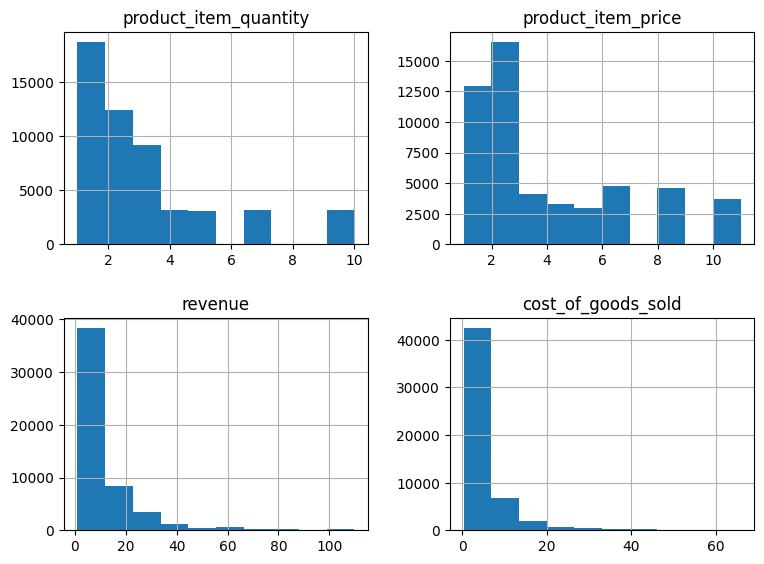

In [26]:
# Explore the distribution of numerical features using histograms
num.hist(figsize=(8, 6))
plt.tight_layout(pad=2)
plt.show()

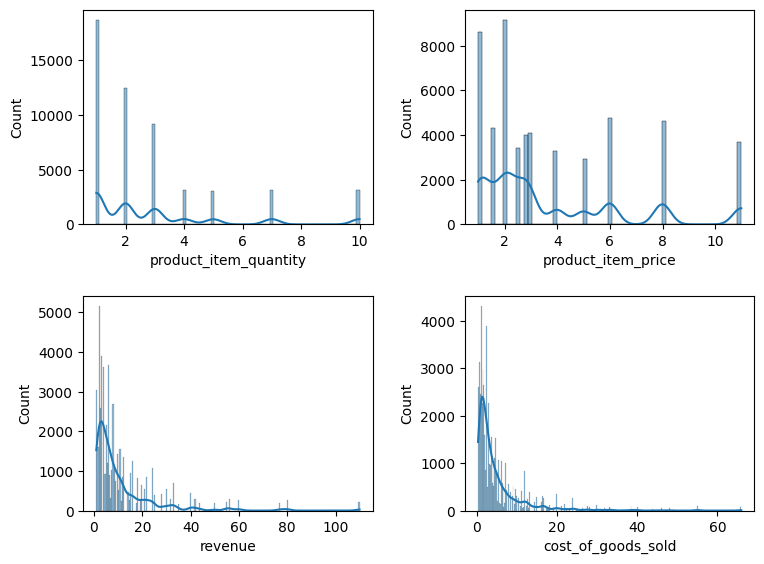

In [27]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 2, i[0] + 1)
    sns.histplot(x=num[i[1]], kde=True)

plt.tight_layout(pad=2)
plt.show()

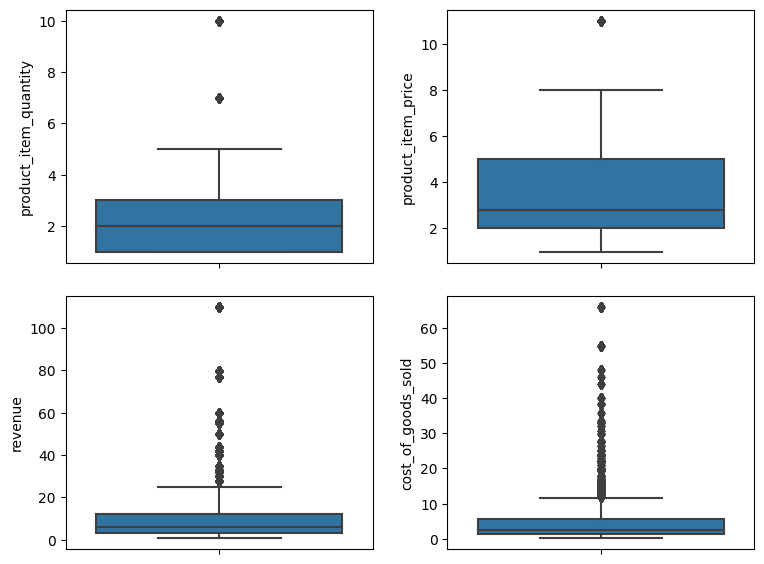

In [28]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 2, i[0] + 1)
    sns.boxplot(y=num[i[1]])

plt.tight_layout(pad=2)
plt.show()

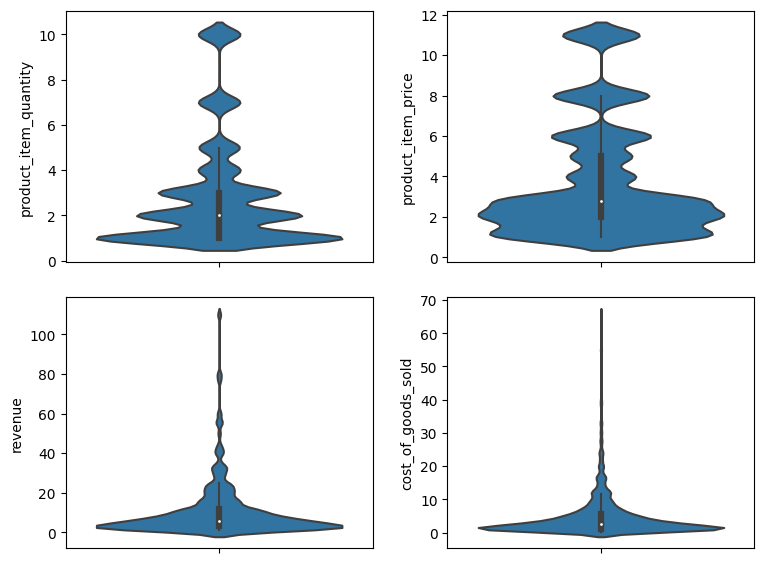

In [29]:
plt.figure(figsize=(8, 6))
for i in enumerate(num):
    plt.subplot(2, 2, i[0] + 1)
    sns.violinplot(y=num[i[1]])

plt.tight_layout(pad=2)
plt.show()

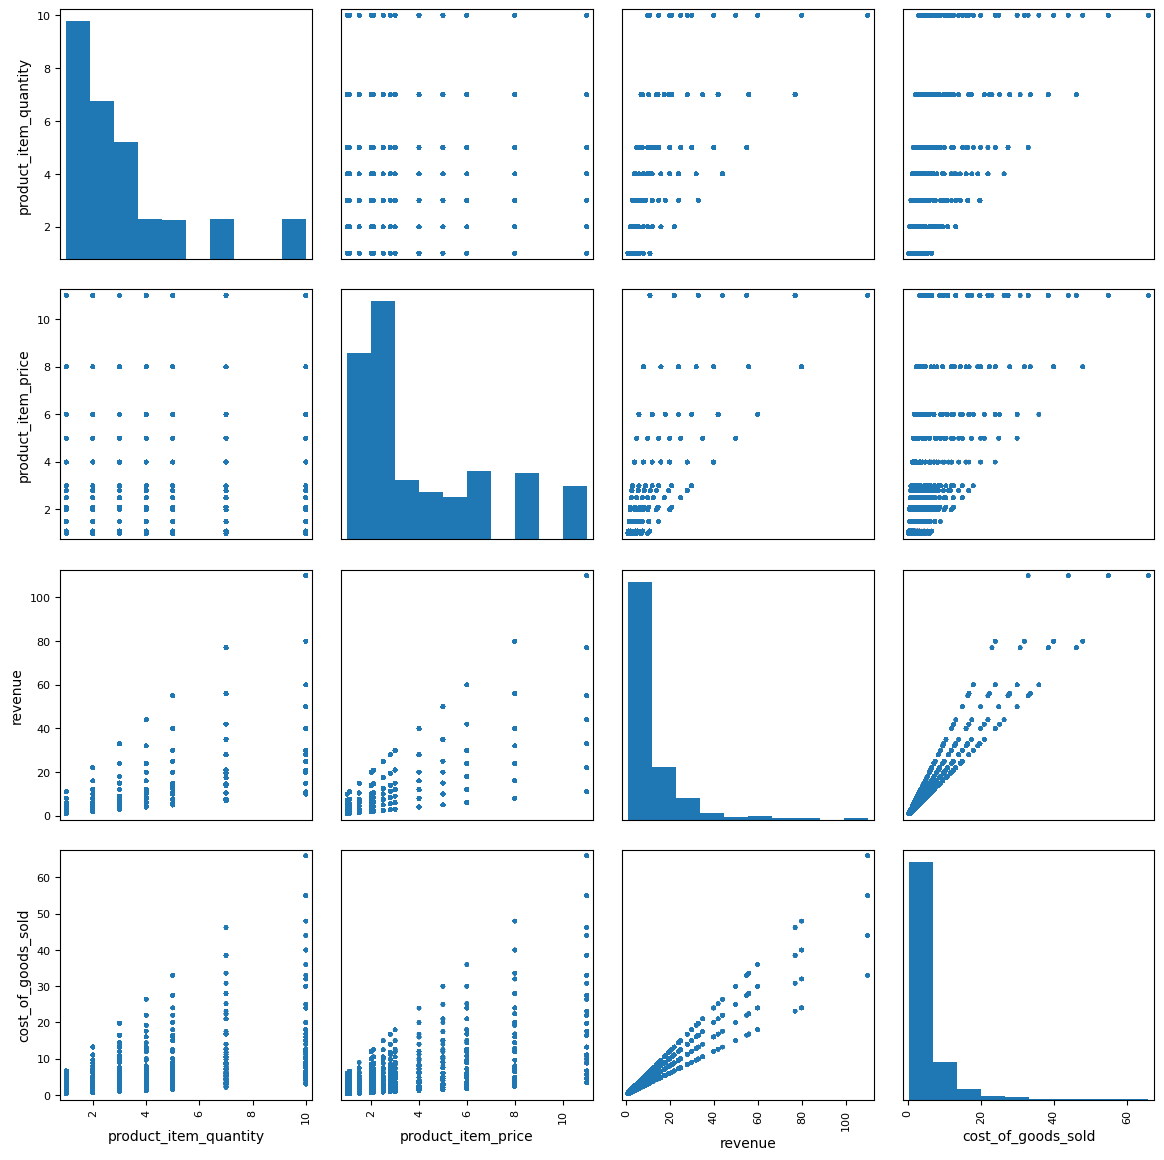

In [30]:
# Generate scatter plots for all pairs of numerical features
pd.plotting.scatter_matrix(df, figsize=(12, 12))
plt.tight_layout(pad=2)
plt.show()

### 2.1.2. Categorical features

In [31]:
# Summary statistics for categorical features
cat.describe().T

,count,unique,top,freq
store,52888,22,Manchester,2946
region,52888,5,Midlands,15218
product_item_id,52888,318,6ffd515d-c720-40b8-9d41-df1119dba059,295
product_item_category,52888,10,Bakery,5382
payment_method,52888,3,cash,17748


## 2.2. Data Insights and Visualization

### 2.2.1. Analyzing monthly `revenue` and `profit` trends

In [32]:
# Create a new column 'month'
df['month'] = df['timestamp'].dt.month
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# Create a new column 'profit'
df['profit'] = df['revenue'] - df['cost_of_goods_sold']

# Calculate the total revenue and profit based on month
revenue_by_month = df.groupby('month')['revenue'].sum()
profit_by_month = df.groupby('month')['profit'].sum()

# Reindex
month_order = list(calendar.month_name[1:])
revenue_by_month = revenue_by_month.reindex(month_order)
profit_by_month = profit_by_month.reindex(month_order)

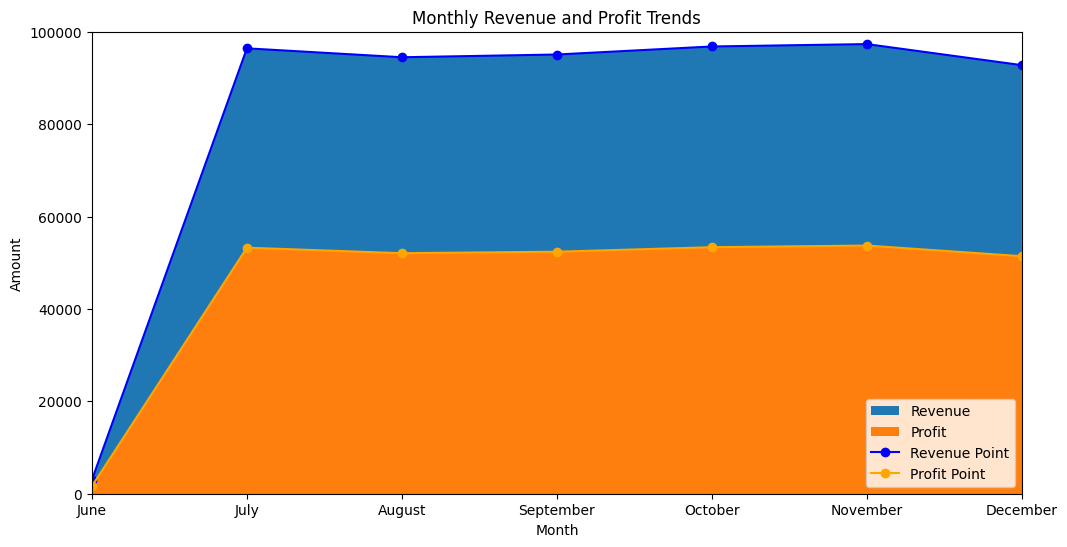

In [33]:
plt.figure(figsize=(12, 6))
plt.stackplot(revenue_by_month.index, revenue_by_month.values, labels=['Revenue'])
plt.stackplot(profit_by_month.index, profit_by_month.values, labels=['Profit'])
plt.plot(revenue_by_month.index, revenue_by_month.values, 'o-', color='blue', label='Revenue Point')
plt.plot(profit_by_month.index, profit_by_month.values, 'o-', color='orange', label='Profit Point')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Revenue and Profit Trends')
plt.legend(loc='lower right')
plt.xlim('June', 'December')
plt.ylim(0, 100000)
plt.show()

🔎 Insights
- Both `revenue` and `profit` generally show an increasing trend over the months.
- The `revenue` steadily grows, indicating a positive sales performance, while the `profit` shows fluctuations but also demonstrates an overall upward trend.

### 2.2.2. Identifying the best and worst `store` performance

🔽 Calculate the total revenue by store

In [34]:
store_revenue = df.groupby('store')['revenue'].sum().sort_values(ascending=False)

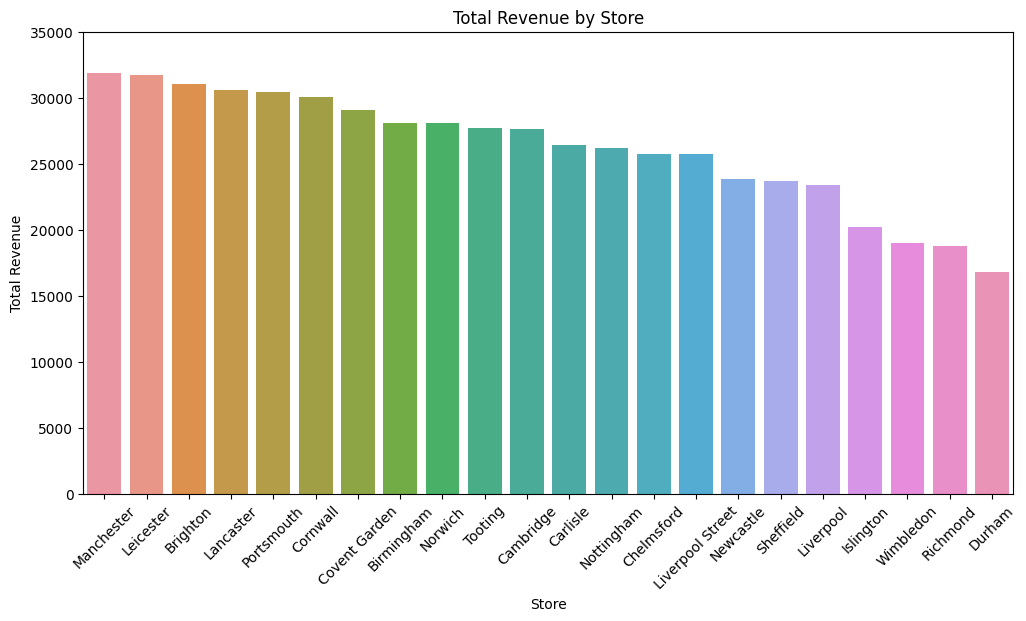

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=store_revenue.index, y=store_revenue.values)
plt.xlabel('Store')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Store')
plt.xticks(rotation=45)
plt.ylim(0, 35000)
plt.show()

🔎 Insights
- Based on the revenue, the stores with the highest and lowest performance are "Manchester" and "Durham" respectively.

### 2.2.3. Identifying the `region` with the highest growth potential for new store openings

🔽 Calculate the total revenue by region

In [36]:
region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

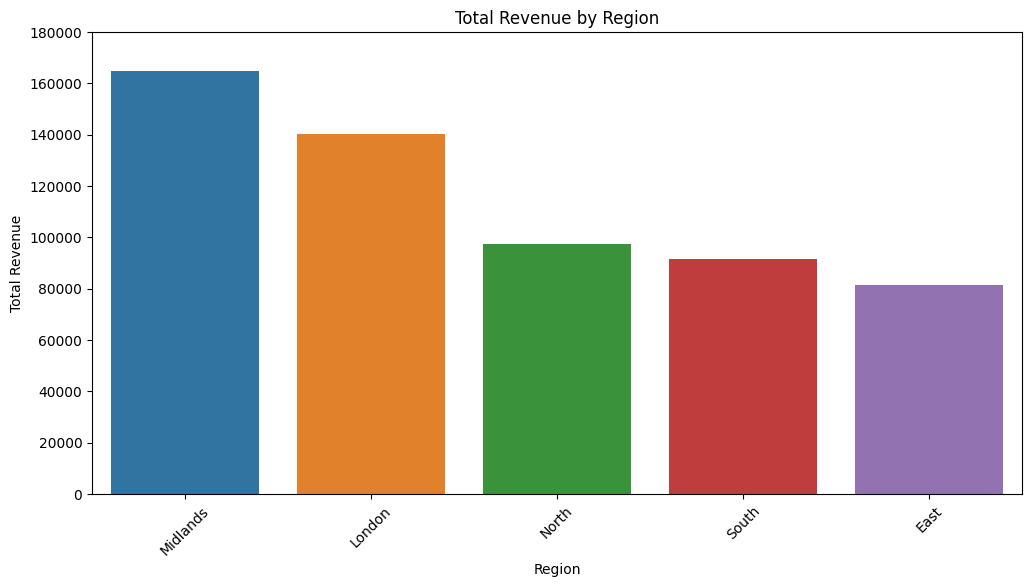

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=region_revenue.index, y=region_revenue.values)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45)
plt.ylim(0, 180000)
plt.show()

🔎 Insights
- Based on the revenue, the region with the highest revenue potential for new store openings is "Midlands".

### 2.2.4. Identifying the top 5 product categories to maximize profit for new store openings

🔽 Calculate the total profit by product category

In [38]:
category_profit = df.groupby('product_item_category')['profit'].sum().sort_values(ascending=False)

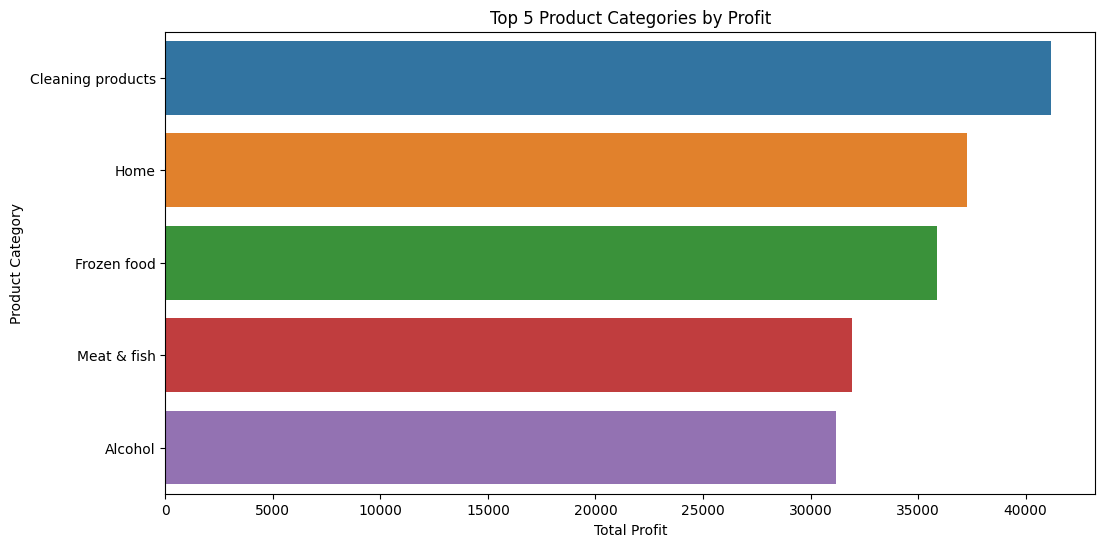

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_profit.head(5).values, y=category_profit.head(5).index)
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.title('Top 5 Product Categories by Profit')
plt.show()

In [40]:
category_profit.head(5)

product_item_category
Cleaning products    41188.17
Home                 37271.52
Frozen food          35865.12
Meat & fish          31937.54
Alcohol              31201.36
Name: profit, dtype: float64

🔎 Insights
- Based on the profit, the top 5 product categories with the highest profit potential are "Cleaning products", "Home", "Frozen food", "Meat & fish", and "Alcohol".

### 2.2.5. Identifying the `payment_method` with the highest `profit`

🔽 Calculate the total profit by payment method

In [41]:
payment_method_profit = df.groupby('payment_method')['profit'].sum().sort_values(ascending=False)

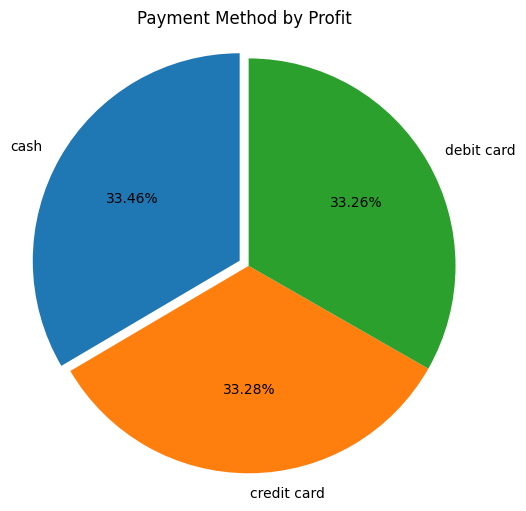

In [42]:
plt.figure(figsize=(6, 6))

payment_method_profit = payment_method_profit.sort_values(ascending=False)
explode = [0] * len(payment_method_profit)
explode[0] = 0.05

sns.set_palette('tab10')
plt.pie(payment_method_profit,
        labels=payment_method_profit.index,
        autopct='%1.2f%%',
        startangle=90,
        explode=explode)

plt.title('Payment Method by Profit')
plt.axis('equal')
plt.show()

🔎 Insights
- Although the pie chart shows similar proportions for each payment method, "cash" stands out as it generates the highest profit, as indicated by the exploded slice.

# 3. Summary

## 3.1. Store Performance

* The best performing store is "Manchester", with the highest revenue and profit.
* The worst performing store is "Durham", with the lowest revenue and profit.

## 3.2. Growth Potential
The region with the largest growth potential for new store openings is:
* Midlands: The revenue and profit have shown consistent growth over the months.

## 3.3. Top Products for Profit Maximization
The top 5 product categories to maximize profit for new store openings are:
* Cleaning products: Highest quantity sold and substantial profit margin.
* Home: Strong demand and good profit potential.
* Frozen food: Consistently high sales volume and profit.
* Meat & fish: Growing market with good profit margins.
* Alcohol: Increasing sales and profit potential.

## 3.4. Payment Method Analysis
* The payment method that generates the highest profit is cash, accounting for 33.46% of total profits.
* Credit card and debit card methods contribute 33.28% and 33.26% of total profits, respectively.